# Step 1: .INI File Configuration

In [ ]:
import configparser
import os
vAR_read_config = configparser.ConfigParser(allow_no_value=True)
vAR_INI_FILE_PATH = os.environ.get('MEDICAL_TRANSCRIPT_INI_FILE_PATH')
vAR_read_config.read(vAR_INI_FILE_PATH)
vAR_Model_Path = vAR_read_config['PATH']['MODEL_FILE_PATH']
vAR_LM_Path = vAR_read_config['PATH']['LM_FILE_PATH']
vAR_Symptom_Path = vAR_read_config['PATH']['SYMPTOMS_PATH']
vAR_Text_Path = vAR_read_config['PATH']['TEXT_FILE']

# Step 2: Importing the Required Libraries

In [ ]:
import nltk
import configparser
import matplotlib.pyplot as plt
from pandas import DataFrame
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import cufflinks as cf
import plotly.offline
import pandas as pd
import numpy as np
from deepspeech import Model 
import numpy as np
import wave


# Step 3: Importing DeepSpeech model for convert audio to text

In [3]:
def main():  
    Voice_to_text()
    Text_Classification_and_Visualization()
    
def Voice_to_text():
    vAR_beam_width=1000
    vAR_lm_alpha=0.93 
    vAR_lm_beta=1.18

    model=Model(vAR_Model_Path)
    model.enableExternalScorer(vAR_LM_Path)

    model.setScorerAlphaBeta(vAR_lm_alpha,vAR_lm_beta)
    model.setBeamWidth(vAR_beam_width)
    
# Conversion of audio data to 16khz
    !ffmpeg -i hospital.wav -vn -ar 16000 -ac 1 hospital1.wav

    def read_wav_file(filename):
        with wave.open(filename, 'rb') as vAR_temp:       # "rb" mode opens the file in binary format for reading
            rate=vAR_temp.getframerate()
            frames=vAR_temp.getnframes()
            buffer=vAR_temp.readframes(frames)
        return buffer, rate

    def transcribe(file):
        buffer,rate=read_wav_file(file)
        data16=np.frombuffer(buffer,dtype=np.int16)
        return model.stt(data16)
    
# Storing the output in a .txt file    
    f= open(vAR_Text_Path,"w+")

    f.write(transcribe('hospital1.wav'))
    f.close()

# Step 4: Text classification and visualization

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.1 (GCC) 20200726
  configuration: --disable-static --enable-shared --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libsrt --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libgsm --enable-librav1e --disable-w32threads --enable-libmfx --enable-ffnvcodec --enable-cuda-llvm --enable-cuvid --enable-d3d11va 

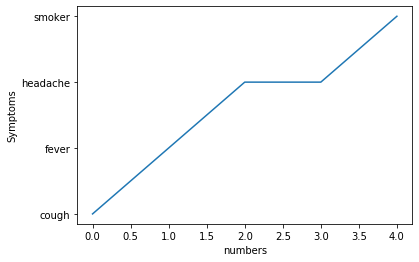

['headache', 'fever', 'smoker', 'cough']


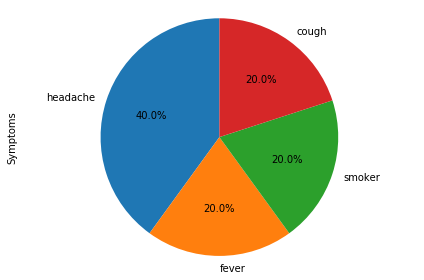

In [4]:
def Text_Classification_and_Visualization():
    with open(vAR_Text_Path,'r') as file:
        read_file = file.read()
# Text analytics (summarized content)
    tokenized_text=sent_tokenize(read_file)
    tokenized_word=word_tokenize(read_file)

    fdist = FreqDist(tokenized_word)
# removing all the stop words
    vAR_stop_words=set(stopwords.words("english"))
    filtered_sent=[]
    for vAR_iter in tokenized_word:
        if vAR_iter not in vAR_stop_words:
            filtered_sent.append(vAR_iter)
    with open(vAR_Symptom_Path, "r") as vAR:
        lines = vAR.readlines()
    Outputlist = []
# matched symptoms from filtered tokenized words from text file
    for vAR_val in filtered_sent:
        with open(vAR_Symptom_Path,"r") as vAR:
            lines = vAR.readlines()
        for line in lines:
            vAR_out = line.strip()
            if vAR_val == vAR_out:
                Outputlist.append(vAR_val)
# Plotting a Line Chart                
    plt.plot(Outputlist)
    plt.ylabel('Symptoms')
    plt.xlabel('numbers')
    plt.show()
    symptoms = list(set(Outputlist))
    print(symptoms)
    vAR_df = DataFrame (Outputlist,columns=['Symptoms'])
    vAR_table=vAR_df['Symptoms'].value_counts()
    
# visualization using Pie chart
    vAR_table.plot.pie(y=vAR_df.index,shadow=False, explode=None, startangle=90, autopct='%1.1f%%')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    cf.go_offline()
    cf.set_config_file(offline=False, world_readable=True)
# visualization using cufflinks and plotly libraries
    vAR_df.iplot(kind='hist',bins=50,xTitle='symptoms',linecolor='black',yTitle='frequency',title='Symptoms frequency distribution')
    
if __name__ == "__main__":
    main()

                                                 @DeepSphere.AI ,Inc